In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
warnings.filterwarnings(action='ignore')

%matplotlib inline
plt.rc('figure', figsize=(9, 5)) # Default figure size
plt.rc('font', size=14)

# **Datascience Lab 12 - Regression Analysis**

## Lab 12-1: Data Processing and Filtering for this lab (1pt)

You have `data_lab12.csv`, which is (again) the weekly Seoul city public bike rent log.
In this time, all the rows with `'Distance'==0 or 'Usage Time'==0` were filtered out already.

In this lab, we will process the data again for regression analysis.

In [2]:
df = pd.read_csv('data_lab12.csv')
df

,Rental Date,Date Rental Time,Rental Station No.,Rental Station Name,Rental Classification Code,Gender,Age Code,Number of Uses,Momentum,Carbon Amount,Distance,Usage Time
0,01/01/2021,0,1952,1952. 천왕연지타운2단지 앞,정기권,F,~10대,1,22.15,0.20,860.60,6
1,01/01/2021,0,1047,1047. 건강보험 강동지사kt,정기권,F,20대,1,27.13,0.32,1370.00,12
2,01/01/2021,0,3411,3411.종묘,정기권,F,20대,1,27.18,0.24,1055.93,8
3,01/01/2021,0,153,153. 성산2교 사거리,정기권,F,20대,1,36.54,0.38,1618.74,11
4,01/01/2021,0,154,154. 마포구청역,정기권,F,20대,1,49.67,0.63,2726.57,15
...,...,...,...,...,...,...,...,...,...,...,...,...
51800,06/01/2021,23,1668,1668. 중계역 6번출구,일일권,F,20대,1,23.70,0.26,1108.24,11
51801,06/01/2021,23,2189,2189.삼성서비스센터(관악점),일일권,F,60대,1,62.18,0.43,1847.25,17
51802,06/01/2021,23,2016,2016. 신대방삼거리역 3번출구쪽,일일권,M,20대,1,56.86,0.51,2209.07,18
51803,06/01/2021,23,725,725. 양강중학교앞 교차로,일일권,M,20대,1,44.00,0.35,1521.90,15


First, add a column `'Average Speed'` calculated in km/h. Note that 'Distance' is in meter, and Usage Time is in minute.

Hint: use `apply` and `lambda`.

In [3]:
# 12-1 begin

df['Average Speed'] = (df['Distance'] / 1000) / (df['Usage Time'] / 60)

Then, leave data between 95--99 percentile of `'Average Speed'` for each gender. 
This is to remove the top 1% outliers, and then extract the fast bikers in general.

Hint: use `Series.quantile` to get the threshold speed for the filter.
* https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html

In [4]:
chan_group = df.groupby('Gender')['Average Speed'].quantile([0.95, 0.99])

chan_lst = df['Gender'].unique()

for gender in chan_lst:
    df = df.drop(df[(df['Gender'] == gender) & (df['Average Speed'] < chan_group[gender][0.95])].index)
    df = df.drop(df[(df['Gender'] == gender) & (df['Average Speed'] > chan_group[gender][0.99])].index)

df
# 12-1 end

,Rental Date,Date Rental Time,Rental Station No.,Rental Station Name,Rental Classification Code,Gender,Age Code,Number of Uses,Momentum,Carbon Amount,Distance,Usage Time,Average Speed
5,01/01/2021,0,623,623. 서울시립대 정문 앞,정기권,F,20대,1,15.06,0.15,633.94,3,12.678800
20,01/01/2021,0,1536,1536. 번동 두산위브 101동 옆,정기권,M,20대,1,132.20,1.29,5563.81,22,15.174027
44,01/01/2021,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,M,30대,1,59.53,0.45,1927.25,7,16.519286
62,01/01/2021,0,1616,1616. 하계2동 공항버스정류장 옆,정기권,M,30대,1,26.86,0.22,968.93,4,14.533950
108,01/01/2021,0,1245,1245. 문정 법조단지9,일일권,M,20대,1,232.91,2.10,9048.60,38,14.287263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51129,06/01/2021,18,1180,1180. 마곡엠밸리 15단지(1502동) 건너편,정기권,M,60대,1,35.54,0.24,1019.85,4,15.297750
51311,06/01/2021,19,1702,1702. 녹천역 1번출구 앞,정기권,M,20대,1,39.36,0.33,1420.00,6,14.200000
51339,06/01/2021,19,3420,3420.성균관대입구사거리(맥도날드),정기권,M,30대,1,10.11,0.07,283.75,1,17.025000
51704,06/01/2021,22,1709,1709. 쌍문역4번출구 주변,정기권,M,20대,1,14.58,0.13,566.40,2,16.992000


---
## Lab 12-2: Visualize the data for confirm the filtered results. (2pt)

Draw a scatter plot, with x axis = `Usage Time` and y axis = `Distance`.

Hint: in `seaborn.scatterplot`, use `hue` to plot data in groups.
* https://seaborn.pydata.org/generated/seaborn.scatterplot.html

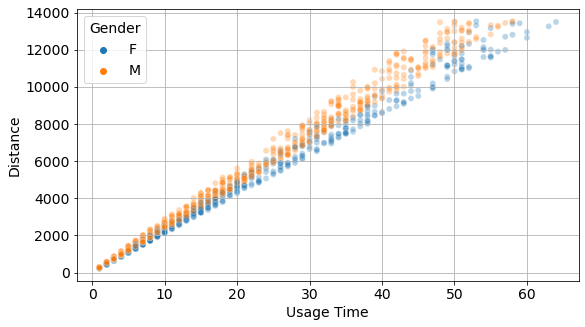

In [5]:
# 12-2 start

sns.scatterplot(data=df, x='Usage Time', y='Distance', hue='Gender', alpha=0.3)

plt.grid(True)
plt.show()

# 12-2 end

## ---
## Lab 12-3: Linear Regression (3pt)

Try linear regressons between `Usage Time`(as input data) and `Distance`(as target). Interpret the slope and intercept into an average speed, and then compare that with the averaged `Average Speed` for each gender.


Example result (Doesn't neccessary to be the same):

||From regression (km/h)|From real data (km/h)|
|------:|---:|---:|
|**Male**|15.01506|15.15053|
|**Female**|13.45640|13.64715|

In [6]:
# 12-3 start

df_M = df[df['Gender']=='M']
df_F = df[df['Gender']=='F']

reg_M = LinearRegression()
reg_F = LinearRegression()

# fit

df_M_distance = (np.array(df_M['Distance'] / 1000)).reshape(-1,1)
df_M_UsageTime = (np.array(df_M['Usage Time'] / 60)).reshape(-1,1)
df_F_distance = (np.array(df_F['Distance'] / 1000)).reshape(-1,1)
df_F_UsageTime = (np.array(df_F['Usage Time'] / 60)).reshape(-1,1)

speed_M = float(reg_M.fit(df_M_UsageTime, df_M_distance).coef_)
speed_F = float(reg_F.fit(df_F_UsageTime, df_F_distance).coef_)

In [7]:
pd.DataFrame([[f'{speed_M:.5f}', f'{df_M["Average Speed"].mean():.5f}']
             ,[f'{speed_F:.5f}', f'{df_F["Average Speed"].mean():.5f}']]
             , columns=['From regression (km/h)', 'From real data (km/h)'], index=['Male', 'Female'])

# 12-3 end

,From regression (km/h),From real data (km/h)
Male,15.01506,15.15053
Female,13.45640,13.64715


## ---
## Lab 12-4: Predict using Linear Regression (4pt)

Use `train_test_split` to separate the train and test sets. Please refer to the hint below for how to use it.

Train the regression model through the train set and validate it using the test set. In this case, use the `.score` method.

Scatter plot the test sets and draw a regression line on it.

- hint
    - **train_test_split**: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    - **.score**: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [8]:
# 12-4 start
# Use train_test_split to separate the train and test sets. Please refer to the hint below for how to use it.
x = df['Usage Time']
y= df['Distance']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [9]:
# Validate regression model using the test set. In this case, use the .score method.
reg = LinearRegression().fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
score=reg.score(np.array(x_test).reshape(-1,1),np.array(y_test).reshape(-1,1))
print(f'The coefficient of determination of the prediction is {score*100:.3f}%')

The coefficient of determination of the prediction is 98.823%


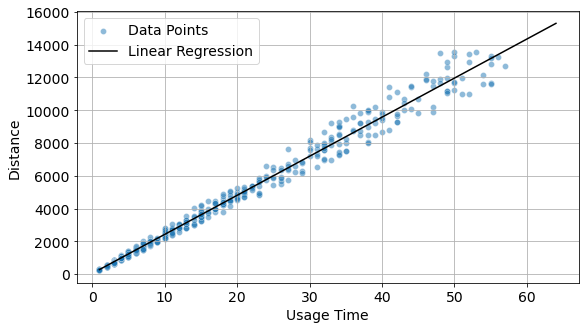

In [10]:
# Scatter plot the test sets and draw a regression line on it.
# Be sure to indicate *legend*, *grid* and x/y label.

sns.scatterplot(x=x_test,y=y_test,alpha=0.5,label='Data Points')

chan_slopes = np.polyfit(x, y, 1)

scope = np.linspace(min(x),max(x),len(x))

chan_poly = np.poly1d(chan_slopes)

plt.plot(scope, chan_poly(scope), label='Linear Regression',color='k')

plt.grid(True)
plt.legend()
plt.xlabel('Usage Time')
plt.ylabel('Distance')

plt.show()
# 12-4 end